# Programming for Data Analysis

## Project 2

### Problem statement

For this project you must create a data set by simulating a real-world phenomenon of
your choosing. You may pick any phenomenon you wish – you might pick one that is
of interest to you in your personal or professional life. Then, rather than collect data
related to the phenomenon, you should model and synthesise such data using Python.
We suggest you use the numpy.random package for this purpose.

Specifically, in this project you should:
• Choose a real-world phenomenon that can be measured and for which you could
collect at least one-hundred data points across at least four different variables.
• Investigate the types of variables involved, their likely distributions, and their
relationships with each other.
• Synthesise/simulate a data set as closely matching their properties as possible.
• Detail your research and implement the simulation in a Jupyter notebook – the
data set itself can simply be displayed in an output cell within the notebook.
Note that this project is about simulation – you must synthesise a data set. Some
students may already have some real-world data sets in their own files. It is okay to
base your synthesised data set on these should you wish (please reference it if you do),
but the main task in this project is to create a synthesised data set. The next section
gives an example project idea.


### Example project idea
As a lecturer I might pick the real-world phenomenon of the performance of students
studying a ten-credit module. After some research, I decide that the most interesting
variable related to this is the mark a student receives in the module - this is going to be
one of my variables (grade).

Upon investigation of the problem, I find that the number of hours on average a
student studies per week (hours), the number of times they log onto Moodle in the
first three weeks of term (logins), and their previous level of degree qualification (qual)
are closely related to grade. The hours and grade variables will be non-negative real
number with two decimal places, logins will be a non-zero integer and qual will be a
categorical variable with four possible values: none, bachelors, masters, or phd.

After some online research, I find that full-time post-graduate students study on average four hours per week with a standard deviation of a quarter of an hour and that
a normal distribution is an acceptable model of such a variable. Likewise, I investigate
the other four variables, and I also look at the relationships between the variables. I
devise an algorithm (or method) to generate such a data set, simulating values of the
four variables for two-hundred students. I detail all this work in my notebook, and then
I add some code in to generate a data set with those properties.


In [15]:
# Importing the libraries
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
#import math
#from math import sqrt

In [5]:
# Importing the tips dataset from the local file
df = pd.read_csv("diamonds2.csv")
df.head()

,price,carat,total_depth_%,table,length,width,depth,cut,color,clarity,color_mod,clarity_mod
0,326,0.23,61.5,55.0,3.95,3.98,2.43,Ideal,E,SI2,2,7
1,340,0.23,62.8,56.0,3.93,3.90,2.46,Ideal,J,VS1,7,4
2,344,0.31,62.2,54.0,4.35,4.37,2.71,Ideal,J,SI2,7,7
3,348,0.30,62.0,54.0,4.31,4.34,2.68,Ideal,I,SI2,6,7
4,403,0.33,61.8,55.0,4.49,4.51,2.78,Ideal,I,SI2,6,7


In [3]:
df['price'].describe()

count    21547.000000
mean      3457.005337
std       3808.170469
min        326.000000
25%        878.000000
50%       1809.000000
75%       4678.000000
max      18806.000000
Name: price, dtype: float64

Here's a quick breakdown of the above as it relates to this particular dataset:

count: there are 244 rows in the dataset.
mean: the average bill.
std: the standard deviation. Standard Deviation tells how measurements for a group are spread out from the average (mean), or expected value. A low standard deviation means that most of the numbers are close to the average. A high standard deviation means that the numbers are more spread out. In our case the measurememnts of a total bill are spread of 8.9 to the left and to the right from the average bill (mean).
min: the smallest bill in the dataset = 3.07 USD
25%: the 25th percentile. 25% of all bills are lower than 13.35 USD.
50%: the 50th percentile, or the median. 50% of bills are lower than 13.80 USD.
75%: the 75th percentile. 75% of bills are lower than 24.13 USD.
max: the highest bill = 50.81 USD.

Also we can visually represent the distribution of the total bills using a histogram.

Histogram shows frequency distribution for a particular column in a dataset. For instance, if we want to see how many times the amount of total_bill is between 10-20, 20-30, 30-40 and so on, we can use a histogram.

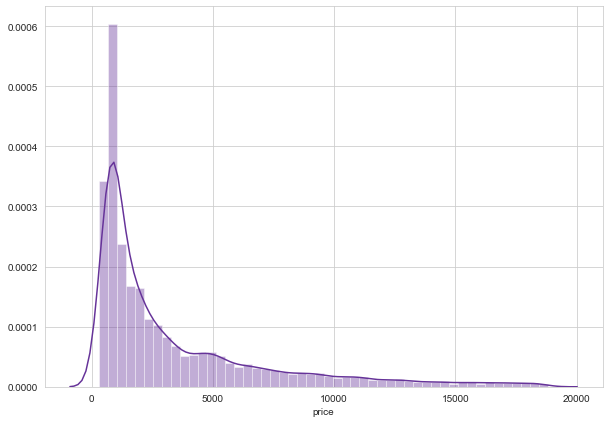

In [6]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,7))
fig.add_subplot(1,1,1)
sns.distplot(df['price'], color="rebeccapurple", bins = 50)

gamma distribution - add more info

In [7]:
s_price = np.random.gamma(1.2, 1500, 20000).astype(np.int)  + np.random.normal(0.0, 600, 20000).astype(np.int)

In [8]:
s_price[s_price<326] = np.random.uniform(326, 18806 + 1, len(s_price[s_price<326]))

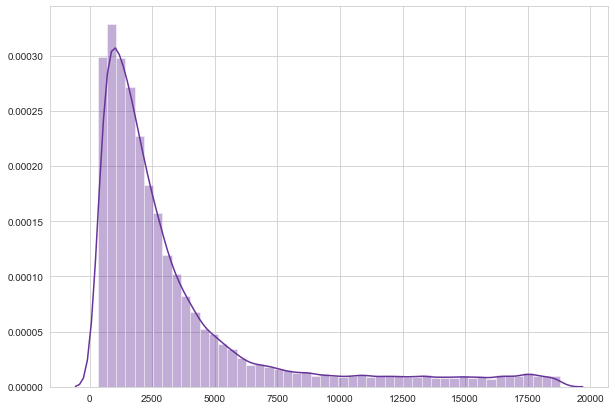

In [9]:
fig = plt.figure(figsize=(10,7))
sns.distplot((s_price), color="rebeccapurple")

In [10]:
sim_mean_p = np.mean(s_price).astype(np.int)
sim_std_p = np.std(s_price).astype(np.int)

print('Mean: ' + str(sim_mean_p))
print('Standard deviation: ' + str(sim_std_p))

Mean: 3441
Standard deviation: 3851


If we compare the Mean and Standard deviation of the simulated price with the actual price (Mean = 3457, Std = 3808), we could see that there's almost no differences in these values.

Therefore we can assume that our simulated price is close enough to the actual data.

## SIMULATED PRICE

In [11]:
s_price

array([1036, 7375, 4008, ..., 2441,  519,  913])

## Length analysis

Now we can go to the next variable - diamond length.

In [18]:
df['length'].describe()

count    21547.000000
mean         5.507915
std          1.062942
min          3.760000
25%          4.540000
50%          5.250000
75%          6.440000
max          9.650000
Name: length, dtype: float64

Let's check if there is any correlation between the price and the length of the diamond.

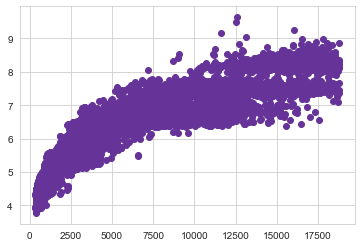

In [12]:
plt.scatter(df['price'], df['length'], color="rebeccapurple")

From the plot above we can clearly see that price depends on the length. 

Let's try to fit a best line into this correlation. FOr this purpose we will be using `scipy.optimize.curve_fit`

In [16]:
x_p = df['price']
y_l = df['length']

scipy.optimize.curve_fit(lambda t, a, b: a + b*np.log(t),  x_p,  y_l)

(array([-2.36435806,  1.03049703]), array([[ 2.35571710e-04, -3.03251944e-05],
        [-3.03251944e-05,  3.96963157e-06]]))

The first array contains *a* and *b* values(-2.36435806 and 1.03049703, respectively), that we're going to use to build our best fit line. As the straigh line won't fit our correlation graph, we will be fitting a logarithmic curve (`y = a + b * log(x)`), wich should suit our purpose much better than the straight line.

The forlmula for y values of the best fit line is: `y ≈ -2.36435806 + 1.03049703 * log(x)`

Now we can update our correlation plot with the best fit line.

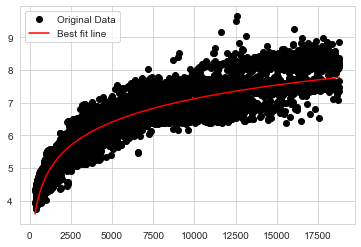

In [19]:
plt.figure()

#Plot price versus length with black dots.
plt.plot(x_p, y_l, 'ko', label = "Original Data")

# Overlay the best fit line on the plot.
# provide the limits for x1 (min price & max price)
x = np.arange(326, 18806, 1)
plt.plot(x, -2.36435806 + 1.03049703 * np.log(x), 'r-', label=r"Best fit line")
plt.legend()
plt.show()

Based on the graph, we are ok to take the best fit line to simulate the diamond length values.

In [113]:
df['length'].describe()

count    21547.000000
mean         5.507915
std          1.062942
min          3.760000
25%          4.540000
50%          5.250000
75%          6.440000
max          9.650000
Name: length, dtype: float64

In [105]:
df['width'].describe()

count    21547.000000
mean         5.519005
std          1.058843
min          3.730000
25%          4.550000
50%          5.260000
75%          6.440000
max          9.590000
Name: width, dtype: float64

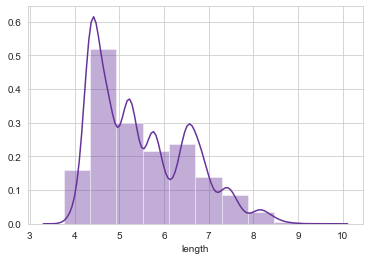

In [27]:
sns.set_style("whitegrid")
#fig = plt.figure(figsize=(10,7))
#fig.add_subplot(1,1,1)
sns.distplot(df['length'], color="rebeccapurple", bins = 10)

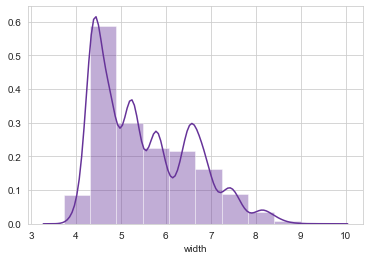

In [106]:
sns.set_style("whitegrid")
#fig = plt.figure(figsize=(10,7))
#fig.add_subplot(1,1,1)
sns.distplot(df['width'], color="rebeccapurple", bins = 10)

If we check the mean, standard deviation and other paramenters from .describe(), we can notice that length and width has almost the same values, therefore are distributed identically.

Let's look at the correlation between these two attributes.

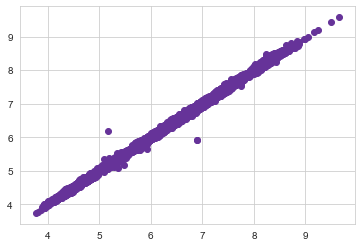

In [104]:
plt.scatter(df['length'], df['width'], color="rebeccapurple")

From the plot above we can see that there is a perfect linear correlation between lenght and weight. Let's figure out the best fit line.

In [ ]:
w = df['width']
l = df['length']

In [112]:
# Calculate the best values for m and c.

# First calculate the means of w and d.
l_avg = np.mean(l)
w_avg = np.mean(w)

# Subtract means from w and d.
l_zero = l - l_avg
w_zero = w - w_avg

# The best m is found by the following calculation.
m = np.sum(l_zero * w_zero) / np.sum(l_zero * l_zero)
# Use m from above to calculate the best c.
c = w_avg - m * l_avg

print("m is %8.6f and c is %6.6f." % (m, c))

m is 0.995319 and c is 0.036870.


Now we got a function y = 0.995319 * x + 0.036870

In [109]:
np.polyfit(l, w, 1)

array([0.99531933, 0.03687045])

The

In [110]:
np.polyfit(w, l, 1)

array([ 1.00303875, -0.02786059])

## PRICE AND LENGHT

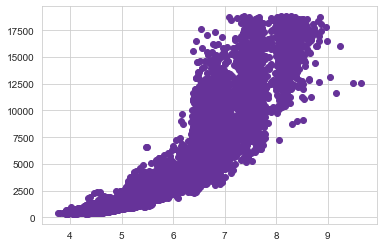

In [173]:
plt.scatter(df['length'], df['price'], color="rebeccapurple")

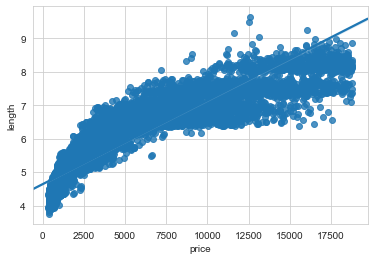

In [172]:
sns.regplot(x="price", y="length", data=df)

In [48]:
p = df['price']
l = df['length']

Finding the best fir line (calculating slope (m) and y intercept (c))

In [60]:
# Calculate the best values for m and c.

# First calculate the means of w and d.
p_avg = np.mean(p)
l_avg = np.mean(l)

# Subtract means from w and d.
p_zero = p - p_avg
l_zero = l - l_avg

# The best m is found by the following calculation.
m_pl = np.sum(p_zero * l_zero) / np.sum(p_zero * l_zero)
# Use m from above to calculate the best c.
c_pl = l_avg - m_pl * p_avg

print("m is %8.6f and c is %6.6f." % (m_pl, c_pl))

m is 1.000000 and c is -3451.497422.


In [144]:
np.polyfit(p, l, 2)

array([-1.80750353e-08,  5.01767929e-04,  4.25142800e+00])

In [159]:
B, A = np.polyfit(p, np.log(l), 1) 

In [160]:
B

4.251235967029773e-05

In [161]:
A

1.5414887004026248

In [163]:
B*x

array([0.        , 0.1062809 , 0.2125618 , 0.3188427 , 0.4251236 ,
       0.5314045 , 0.6376854 , 0.74396629, 0.85024719, 0.95652809])

In [167]:
A*np.e

4.190200723079404

In [169]:
y = A*np.e**(B*x)

In [170]:
y

array([1.5414887 , 1.71434235, 1.90657881, 2.12037156, 2.35813779,
       2.62256575, 2.91664515, 3.2437009 , 3.60743081, 4.01194728])

In [ ]:
-1.80750353e-08 * x**2 + 5.01767929e-04 * x +  4.25142800e+00

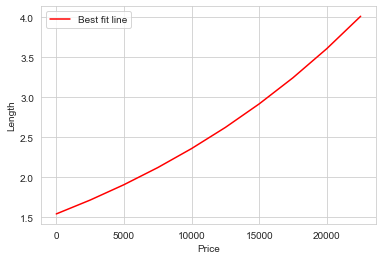

In [171]:
#Plot w versus d with black dots.
#plt.plot(p, l, 'k.', label="Data")

# Overlay some lines on the plot.
x = np.arange(0, 25000, 2500)
plt.plot(x, A*np.e**(B*x), 'r-', label=r"Best fit line")
#plt.plot(x, np.sqrt(x) - 140, 'r-', label=r"Best fit line")
#y = Ae^(Bx)

# Add a legend.
plt.legend()

# Add axis labels.
plt.xlabel('Price')
plt.ylabel('Length')

# Show the plot.
plt.show()

## WEIGHT AND DEPTH

In [37]:
w = df['width']
d = df['depth']

Finding the best fir line (calculating slope (m) and y intercept (c))

In [40]:
# Calculate the best values for m and c.

# First calculate the means of w and d.
w_avg = np.mean(w)
d_avg = np.mean(d)

# Subtract means from w and d.
w_zero = w - w_avg
d_zero = d - d_avg

# The best m is found by the following calculation.
m = np.sum(w_zero * d_zero) / np.sum(w_zero * w_zero)
# Use m from above to calculate the best c.
c = d_avg - m * w_avg

print("m is %8.6f and c is %6.6f." % (m, c))

m is 0.617490 and c is -0.006088.


In [41]:
np.polyfit(w, d, 1)

array([ 0.61748991, -0.00608758])

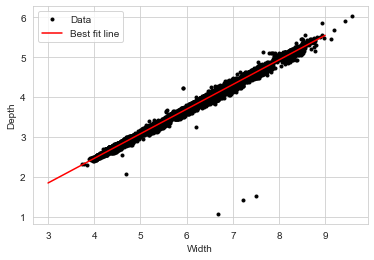

In [72]:
#Plot w versus d with black dots.
plt.plot(w, d, 'k.', label="Data")

# Overlay some lines on the plot.
x = np.arange(3.0, 9.5, 1.0)
plt.plot(x, m * x + c, 'r-', label=r"Best fit line")


# Add a legend.
plt.legend()

# Add axis labels.
plt.xlabel('Width')
plt.ylabel('Depth')

# Show the plot.
plt.show()

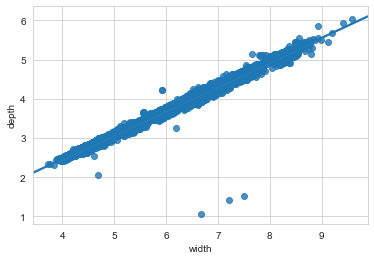

In [44]:
sns.regplot(x="width", y="depth", data=df)

In [36]:
s_price

array([ 1860,  1400, 10095, ...,  2867,  3833,   906])

In [20]:
df['depth'].describe()

count    21547.000000
mean         3.401842
std          0.656379
min          1.070000
25%          2.800000
50%          3.230000
75%          3.980000
max          6.030000
Name: depth, dtype: float64

In [21]:
df['carat'].describe()

count    21547.000000
mean         0.702768
std          0.432857
min          0.200000
25%          0.350000
50%          0.540000
75%          1.010000
max          3.500000
Name: carat, dtype: float64

In [64]:
chi_sqr = np.random.noncentral_chisquare(1.6, 0.1, 20000)*1000

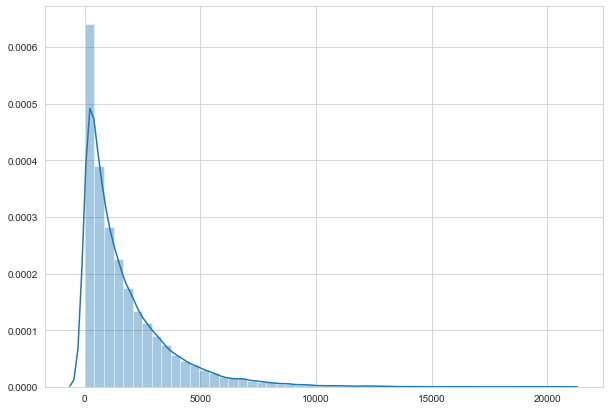

In [65]:
fig = plt.figure(figsize=(10,7))
sns.distplot(chi_sqr)

In [67]:
sim_mean_p = np.mean(chi_sqr)
sim_std_p = np.std(chi_sqr)

print('Mean of the simulated diamond length values: ' + str(sim_mean_p))
print('Standard deviation of the simulated diamond length values: ' + str(sim_std_p))

Mean of the simulated diamond length values: 1704.5104566916316
Standard deviation of the simulated diamond length values: 1889.2281911656971


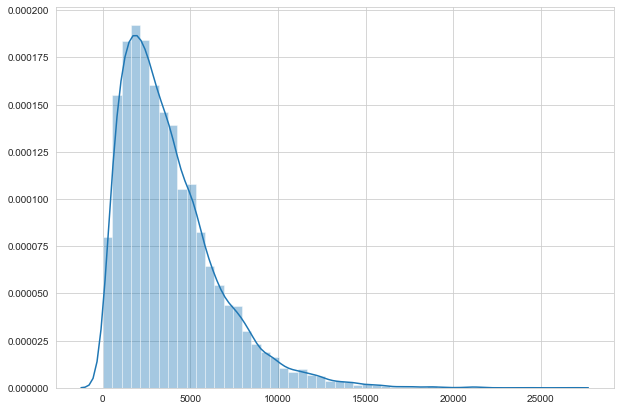

In [5]:
chi_sqr = np.random.noncentral_chisquare(3.8, .01, 10000)*1000
fig = plt.figure(figsize=(10,7))
sns.distplot(chi_sqr)

In [9]:
sim_mean_p = np.mean(chi_sqr)
sim_std_p = np.std(chi_sqr)

print('Mean of the simulated diamond length values: ' + str(sim_mean_p))
print('Standard deviation of the simulated diamond length values: ' + str(sim_std_p))

Mean of the simulated diamond length values: 3794.489434013389
Standard deviation of the simulated diamond length values: 2769.44805322789


In [10]:
df['price'].describe()

count    10000.00000
mean      5251.86890
std       4400.31301
min        340.00000
25%       1822.00000
50%       3796.50000
75%       7465.25000
max      18806.00000
Name: price, dtype: float64

In [11]:
noise = np.random.normal(0.0, 200, chi_sqr.shape)

In [12]:
noise

array([  59.07054385, -452.23941259,  244.99190762, ...,   14.28382514,
       -129.60155987,   14.58167685])

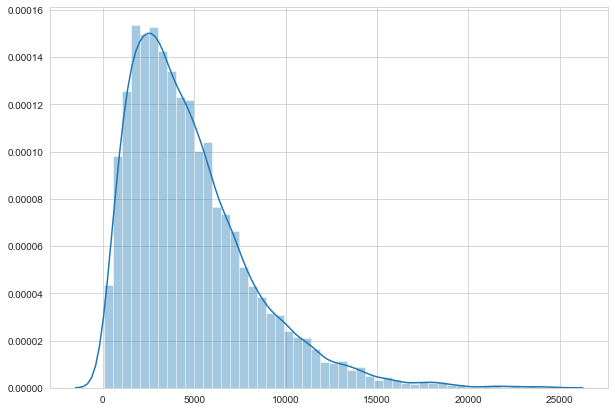

In [43]:
gm = np.random.gamma(2.0, 2400, 10000)
fig = plt.figure(figsize=(10,7))
sns.distplot(gm)

# testng gamma and chi square

In [30]:
chi_sqr = np.random.noncentral_chisquare(2.5, 0.00001, 20000)*1000

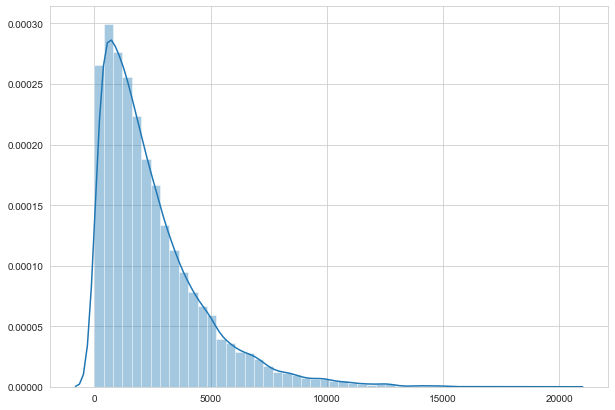

In [31]:
fig = plt.figure(figsize=(10,7))
sns.distplot(chi_sqr)

In [331]:
sim_mean_p = np.mean(chi_sqr)
sim_std_p = np.std(chi_sqr)

print('Mean of the simulated diamond length values: ' + str(sim_mean_p))
print('Standard deviation of the simulated diamond length values: ' + str(sim_std_p))

Mean of the simulated diamond length values: 3513.9483185246445
Standard deviation of the simulated diamond length values: 2655.3752946962277


In [356]:
chi_sqr = np.random.noncentral_chisquare(3.8, 1, 10000)*1000 + np.random.normal(0.0, 500, 10000)

In [357]:
chi_sqr[chi_sqr<340] =  np.random.uniform(340, 18806 + 1, len(chi_sqr[chi_sqr<340]))

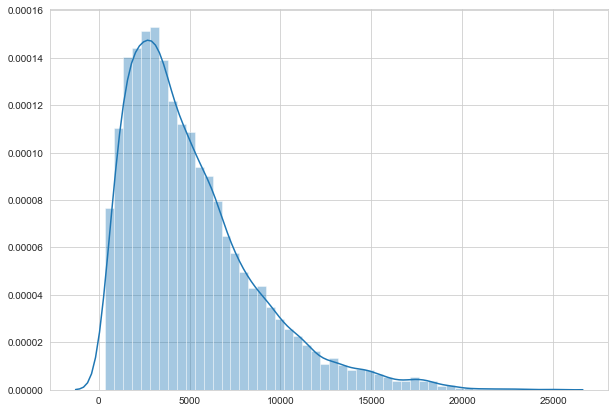

In [358]:
fig = plt.figure(figsize=(10,7))
sns.distplot(chi_sqr)

In [359]:
sim_mean_p = np.mean(chi_sqr)
sim_std_p = np.std(chi_sqr)

print('Mean of the simulated diamond length values: ' + str(sim_mean_p))
print('Standard deviation of the simulated diamond length values: ' + str(sim_std_p))

Mean of the simulated diamond length values: 5057.06119615622
Standard deviation of the simulated diamond length values: 3566.1752992561087


In [261]:
df['price'].describe()

count    10000.00000
mean      5251.86890
std       4400.31301
min        340.00000
25%       1822.00000
50%       3796.50000
75%       7465.25000
max      18806.00000
Name: price, dtype: float64

In [360]:
gamma = np.random.gamma(2.0, 2300, 10000) + np.random.normal(0.0, 500, gamma.shape)

In [361]:
gamma[gamma<340] = np.random.uniform(340, 18806 + 1, len(gamma[gamma<340]))

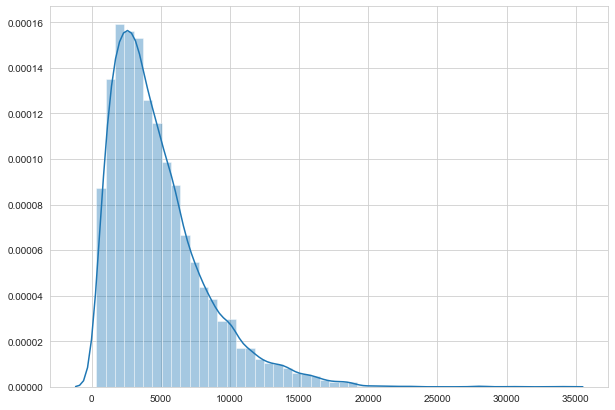

In [362]:
fig = plt.figure(figsize=(10,7))
sns.distplot(gamma)

In [363]:
sim_mean_p1 = np.mean(gamma)
sim_std_p1 = np.std(gamma)

print('Mean of the simulated diamond length values: ' + str(sim_mean_p1))
print('Standard deviation of the simulated diamond length values: ' + str(sim_std_p1))

Mean of the simulated diamond length values: 4802.0163159995745
Standard deviation of the simulated diamond length values: 3402.3099416365976


# end

In [260]:
df['price'].describe()

count    10000.00000
mean      5251.86890
std       4400.31301
min        340.00000
25%       1822.00000
50%       3796.50000
75%       7465.25000
max      18806.00000
Name: price, dtype: float64

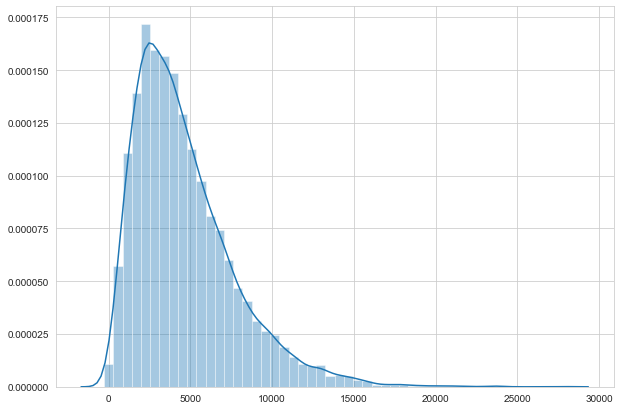

In [23]:
gamma = np.random.gamma(2.3, 2000, 10000) + np.random.normal(0.0, 200, gamma.shape)
fig = plt.figure(figsize=(10,7))
sns.distplot(gamma)

In [8]:
sim_mean_p1 = np.mean(gamma)
sim_std_p1 = np.std(gamma)

print('Mean of the simulated diamond length values: ' + str(sim_mean_p1))
print('Standard deviation of the simulated diamond length values: ' + str(sim_std_p1))

Mean of the simulated diamond length values: 5023.686321149237
Standard deviation of the simulated diamond length values: 3296.582625530553


In [26]:
df['carat'].describe()

count    48704.000000
mean         0.696745
std          0.357456
min          0.200000
25%          0.380000
50%          0.600000
75%          1.010000
max          3.110000
Name: carat, dtype: float64

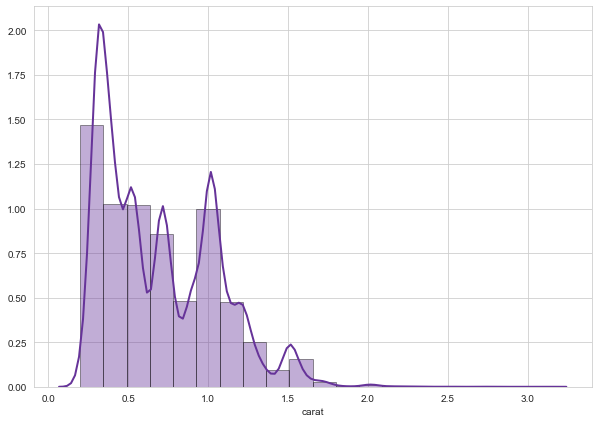

In [105]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,7))
sns.distplot(df['carat'], color="rebeccapurple", bins = 20, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

In [86]:
df['depth'].describe()

count    48703.000000
mean         3.412032
std          0.590573
min          1.070000
25%          2.860000
50%          3.350000
75%          3.950000
max          5.980000
Name: depth, dtype: float64

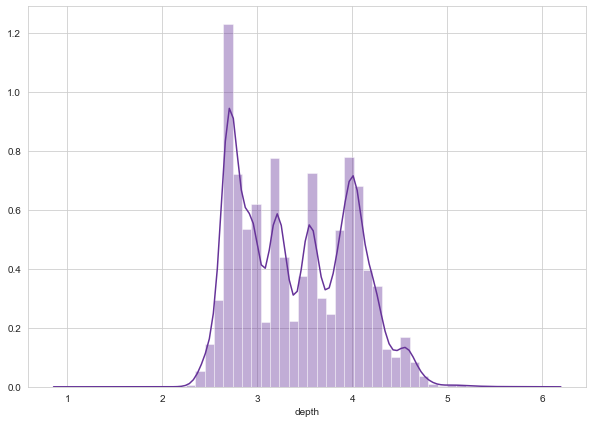

In [87]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,7))
sns.distplot(df['depth'], color="rebeccapurple")

In [88]:
df['length'].describe()

count    48703.000000
mean         5.523544
std          0.951846
min          3.730000
25%          4.640000
50%          5.430000
75%          6.380000
max          9.240000
Name: length, dtype: float64

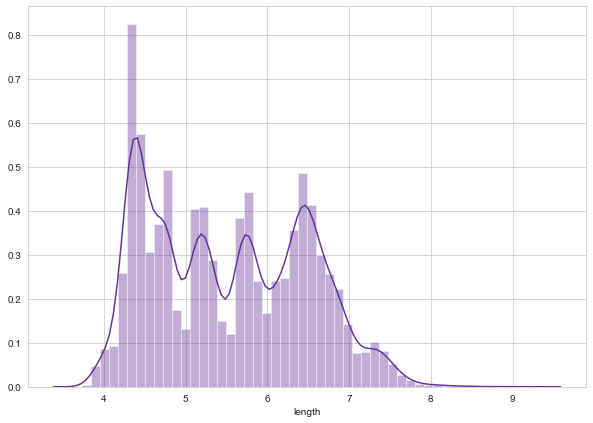

In [90]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,7))
sns.distplot(df['length'], color="rebeccapurple")

In [91]:
df['width'].describe()

count    48703.000000
mean         5.526410
std          0.944412
min          3.680000
25%          4.655000
50%          5.440000
75%          6.370000
max          9.130000
Name: width, dtype: float64

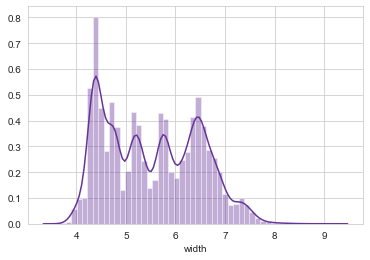

In [92]:
sns.set_style("whitegrid")
sns.distplot(df['width'], color="rebeccapurple")

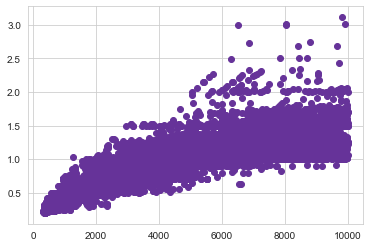

In [94]:
plt.scatter(df['price'], df['carat'], color="rebeccapurple")

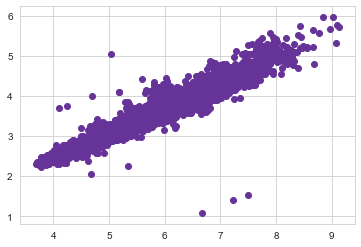

In [93]:
plt.scatter(df['width'], df['depth'], color="rebeccapurple")

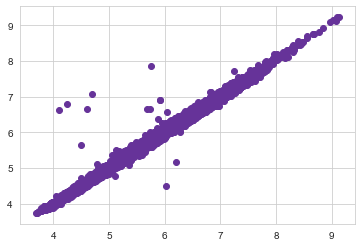

In [44]:
plt.scatter(df['width'], df['length'], color="rebeccapurple")

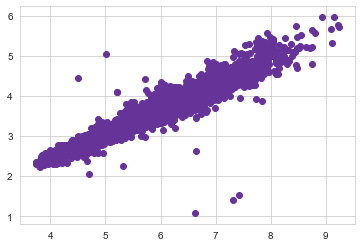

In [46]:
#plt.axis([0, 6, 0, 20])
plt.scatter(df['length'], df['depth'], color="rebeccapurple")

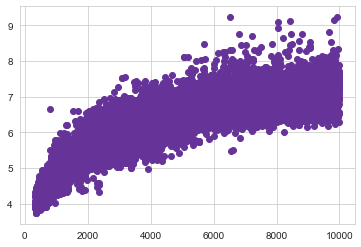

In [95]:
plt.scatter(df['price'], df['length'], color="rebeccapurple")

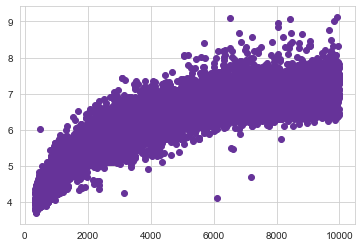

In [96]:
plt.scatter(df['price'], df['width'], color="rebeccapurple")

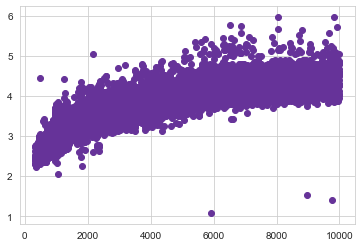

In [97]:
plt.scatter(df['price'], df['depth'], color="rebeccapurple")

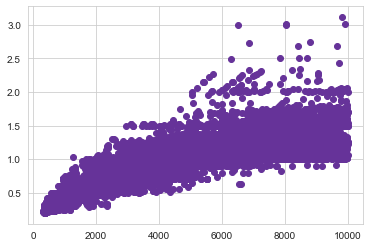

In [98]:
plt.scatter(df['price'], df['carat'], color="rebeccapurple")

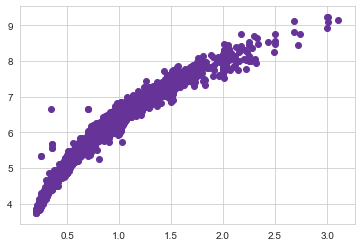

In [99]:
plt.scatter(df['carat'], df['length'], color="rebeccapurple")

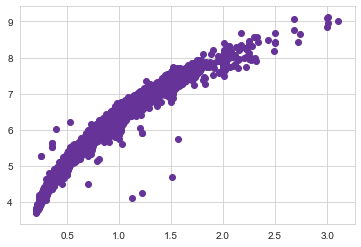

In [100]:
plt.scatter(df['carat'], df['width'], color="rebeccapurple")

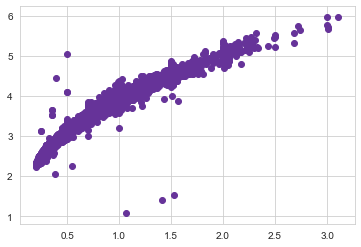

In [101]:
plt.scatter(df['carat'], df['depth'], color="rebeccapurple")

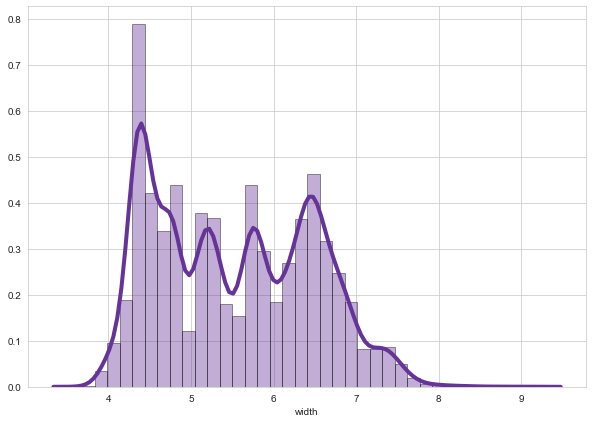

In [81]:
#set_style("whitegrid")
fig = plt.figure(figsize=(10,7))
sns.distplot(df['width'], color="rebeccapurple", bins = int(180/5), 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

(array([1.700e+01, 2.460e+02, 6.980e+02, 1.386e+03, 5.810e+03, 3.111e+03,
        2.497e+03, 3.235e+03, 8.900e+02, 2.784e+03, 2.710e+03, 1.332e+03,
        1.131e+03, 3.234e+03, 2.174e+03, 1.353e+03, 1.980e+03, 2.697e+03,
        3.417e+03, 2.339e+03, 1.818e+03, 1.363e+03, 6.010e+02, 6.090e+02,
        6.400e+02, 3.620e+02, 1.350e+02, 4.800e+01, 3.500e+01, 2.000e+01,
        1.100e+01, 8.000e+00, 4.000e+00, 2.000e+00, 2.000e+00, 4.000e+00]),
 array([3.68      , 3.83138889, 3.98277778, 4.13416667, 4.28555556,
        4.43694444, 4.58833333, 4.73972222, 4.89111111, 5.0425    ,
        5.19388889, 5.34527778, 5.49666667, 5.64805556, 5.79944444,
        5.95083333, 6.10222222, 6.25361111, 6.405     , 6.55638889,
        6.70777778, 6.85916667, 7.01055556, 7.16194444, 7.31333333,
        7.46472222, 7.61611111, 7.7675    , 7.91888889, 8.07027778,
        8.22166667, 8.37305556, 8.52444444, 8.67583333, 8.82722222,
        8.97861111, 9.13      ]),
 <a list of 36 Patch objects>)

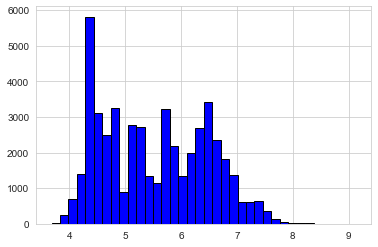

In [76]:
plt.hist(df['width'], color = 'blue', edgecolor = 'black', bins = int(180/5))

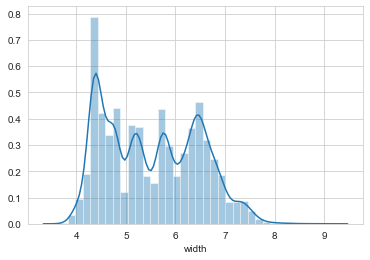

In [78]:
sns.distplot(df['width'], bins = int(180/5))

# Testing cases

In [4]:
from scipy.stats import expon
from scipy.stats import poisson

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Exponential Distribution')]

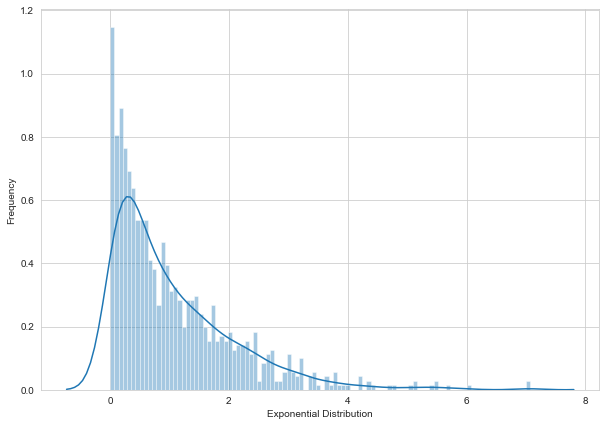

In [59]:
data_expon = expon.rvs(scale=1,loc=0,size=1000)

fig = plt.figure(figsize=(10,7))
ax = sns.distplot(data_expon, bins=100)
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')

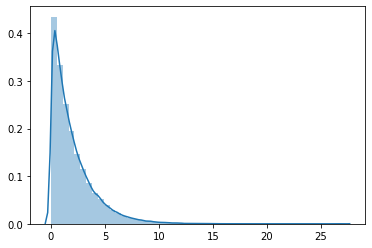

In [5]:
g_shape, g_scale, g_size = 1, 2, 100000
gamma = np.random.gamma(g_shape, g_scale, g_size)
sns.distplot(gamma)

In [200]:
gamma = np.random.gamma(2.0, 2200, 10000) + np.random.normal(0.0, 500, 10000)

In [201]:
gamma[gamma<340] = np.random.randint(340, 18806 + 1)
#gamma

In [202]:
sim_mean_p1 = np.mean(gamma)
sim_std_p1 = np.std(gamma)

print('Mean of the simulated diamond length values: ' + str(sim_mean_p1))
print('Standard deviation of the simulated diamond length values: ' + str(sim_std_p1))

Mean of the simulated diamond length values: 4652.43128508938
Standard deviation of the simulated diamond length values: 3148.6983688279565


In [190]:
df['price'].describe()

count    10000.00000
mean      5251.86890
std       4400.31301
min        340.00000
25%       1822.00000
50%       3796.50000
75%       7465.25000
max      18806.00000
Name: price, dtype: float64

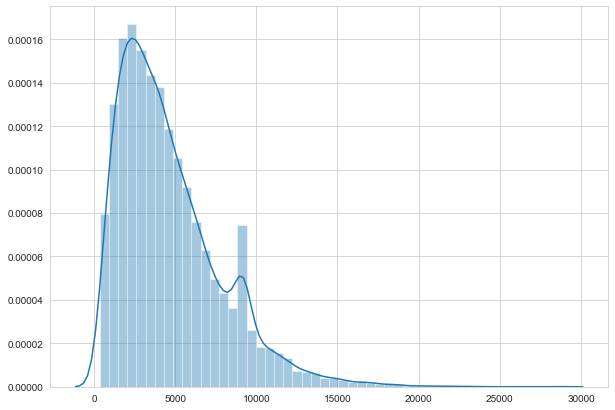

In [203]:
#gammat = np.random.gamma(2.0, 2000, 10000)
fig = plt.figure(figsize=(10,7))
sns.distplot(gamma)

In [3]:
# Importing the tips dataset from the local file
df = pd.read_csv("diamonds_full.csv")
df.head()

,price,carat,total_depth_%,table,length,width,depth,cut,color,clarity,color_mod,clarity_mod
0,326,0.23,61.5,55.0,3.95,3.98,2.43,Ideal,E,SI2,2,7
1,326,0.21,59.8,61.0,3.89,3.84,2.31,Premium,E,SI1,2,6
2,327,0.23,56.9,65.0,4.05,4.07,2.31,Good,E,VS1,2,4
3,334,0.29,62.4,58.0,4.20,4.23,2.63,Premium,I,VS2,6,5
4,335,0.31,63.3,58.0,4.34,4.35,2.75,Good,J,SI2,7,7


In [25]:
df1 = df.loc[df.loc[:, 'cut'] == 'Ideal']

In [6]:
df1.head()

,price,carat,total_depth_%,table,length,width,depth,cut,color,clarity,color_mod,clarity_mod
0,326,0.23,61.5,55.0,3.95,3.98,2.43,Ideal,E,SI2,2,7
11,340,0.23,62.8,56.0,3.93,3.90,2.46,Ideal,J,VS1,7,4
13,344,0.31,62.2,54.0,4.35,4.37,2.71,Ideal,J,SI2,7,7
16,348,0.30,62.0,54.0,4.31,4.34,2.68,Ideal,I,SI2,6,7
39,403,0.33,61.8,55.0,4.49,4.51,2.78,Ideal,I,SI2,6,7


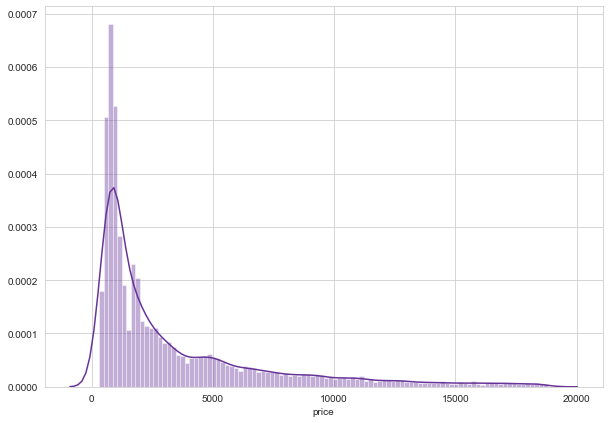

In [26]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,7))
fig.add_subplot(1,1,1)
sns.distplot(df1['price'], color="rebeccapurple", bins = 100)

In [27]:
df1['price'].describe()

count    21551.000000
mean      3457.541970
std       3808.401172
min        326.000000
25%        878.000000
50%       1810.000000
75%       4678.500000
max      18806.000000
Name: price, dtype: float64

In [37]:
chi_sqr = np.random.noncentral_chisquare(2.5, 0.00001, 21551)*1000

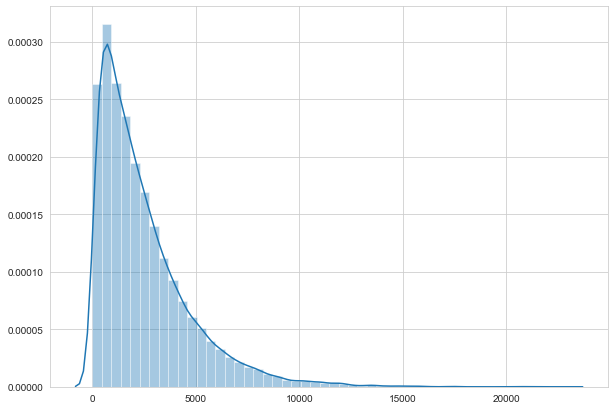

In [38]:
fig = plt.figure(figsize=(10,7))
sns.distplot(chi_sqr)

In [143]:
np.polyfit(l, w, 2)

array([-0.00351489,  1.03655288, -0.07963763])

In [182]:
from pylab import *
from scipy.optimize import curve_fit

In [176]:
x = df['length']
y = df['price']

In [175]:
x = np.array(df['length'])
x

array([3.95, 3.93, 4.35, ..., 5.76, 5.75, 5.83])

In [3]:
from pylab import *
from kapteyn import kmpfit

ModuleNotFoundError: No module named 'kapteyn'